In [16]:
# Going to be performing a linear regression on a housing dataset




# Here is the order of the process:
# 1) Clean the dataset
#     - find and deal with outliers
#     - find and deal with missing data (numerical)
    

In [17]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
os.getcwd()

'C:\\Users\\bgosh\\OneDrive\\Documents\\Python_Notebooks'

In [19]:

df = pd.read_csv(os.getcwd()+'\\DATA\\Ames_Housing_Data.csv')

In [20]:
df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [21]:
with open(os.getcwd()+'\\DATA\\Ames_Housing_Feature_Description.txt','r') as f: 
    print(f.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [22]:
# Are there sale prices that are outliers against features that are highly correlated to the features?

In [23]:
df.corr()['SalePrice'].sort_values()

PID               -0.246521
Enclosed Porch    -0.128787
Kitchen AbvGr     -0.119814
Overall Cond      -0.101697
MS SubClass       -0.085092
Low Qual Fin SF   -0.037660
Bsmt Half Bath    -0.035835
Yr Sold           -0.030569
Misc Val          -0.015691
BsmtFin SF 2       0.005891
3Ssn Porch         0.032225
Mo Sold            0.035259
Pool Area          0.068403
Screen Porch       0.112151
Bedroom AbvGr      0.143913
Bsmt Unf SF        0.182855
Lot Area           0.266549
2nd Flr SF         0.269373
Bsmt Full Bath     0.276050
Half Bath          0.285056
Open Porch SF      0.312951
Wood Deck SF       0.327143
Lot Frontage       0.357318
BsmtFin SF 1       0.432914
Fireplaces         0.474558
TotRms AbvGrd      0.495474
Mas Vnr Area       0.508285
Garage Yr Blt      0.526965
Year Remod/Add     0.532974
Full Bath          0.545604
Year Built         0.558426
1st Flr SF         0.621676
Total Bsmt SF      0.632280
Garage Area        0.640401
Garage Cars        0.647877
Gr Liv Area        0

In [24]:
# Lets check outliers for Overall Qual and GR Liv Area

<AxesSubplot:xlabel='Overall Qual', ylabel='SalePrice'>

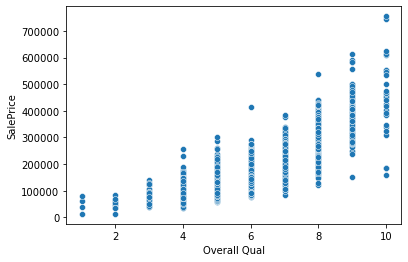

In [25]:
sns.scatterplot(x='Overall Qual', y = 'SalePrice', data=df)

<AxesSubplot:xlabel='Gr Liv Area', ylabel='SalePrice'>

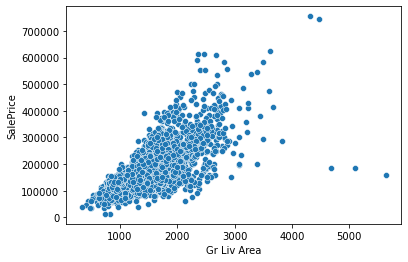

In [26]:
sns.scatterplot(x='Gr Liv Area', y='SalePrice', data=df)

In [27]:
df[(df['Overall Qual']>8) & (df['SalePrice']<200000)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1182,533350090,60,RL,NaN,24572,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Family,150000
1498,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


In [28]:
df[(df['Gr Liv Area']>4500) & (df['SalePrice']<200000)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1498,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


In [29]:
# Three houses are for some reason very high quality and very low price loc = [1498,2180,2181].
# Let's drop them

In [30]:
df= df.drop([1498,2180,2181],axis=0)

<AxesSubplot:xlabel='Gr Liv Area', ylabel='SalePrice'>

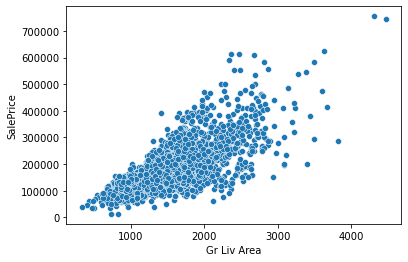

In [31]:
sns.scatterplot(x='Gr Liv Area',y='SalePrice',data=df)

<AxesSubplot:xlabel='Overall Qual', ylabel='SalePrice'>

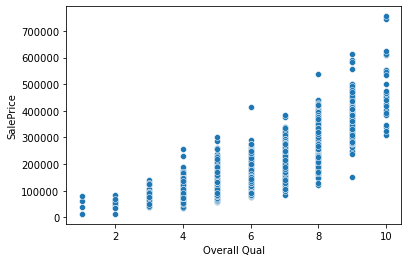

In [32]:
sns.scatterplot(x='Overall Qual',y='SalePrice',data=df)

In [33]:
# The three obvious outliers seem to be gone, the rest of the data seems to be under a more linear relationship between the variables

In [34]:
# Are there any useless volumns? 

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2927 entries, 0 to 2929
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2927 non-null   int64  
 1   MS SubClass      2927 non-null   int64  
 2   MS Zoning        2927 non-null   object 
 3   Lot Frontage     2437 non-null   float64
 4   Lot Area         2927 non-null   int64  
 5   Street           2927 non-null   object 
 6   Alley            198 non-null    object 
 7   Lot Shape        2927 non-null   object 
 8   Land Contour     2927 non-null   object 
 9   Utilities        2927 non-null   object 
 10  Lot Config       2927 non-null   object 
 11  Land Slope       2927 non-null   object 
 12  Neighborhood     2927 non-null   object 
 13  Condition 1      2927 non-null   object 
 14  Condition 2      2927 non-null   object 
 15  Bldg Type        2927 non-null   object 
 16  House Style      2927 non-null   object 
 17  Overall Qual  

In [36]:
df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [37]:
# Can drop PID as its just an ID but we already have index as ID

In [38]:
df = df.drop('PID',axis=1)

In [39]:
len(df.columns)

80

In [40]:
# Let's find missing values

In [41]:
df.isnull().sum().sort_values()

MS SubClass          0
Sale Condition       0
Central Air          0
1st Flr SF           0
2nd Flr SF           0
                  ... 
Fireplace Qu      1422
Fence             2355
Alley             2729
Misc Feature      2822
Pool QC           2915
Length: 80, dtype: int64

In [42]:
(100*df.isnull().sum()/len(df)).sort_values()

MS SubClass        0.000000
Sale Condition     0.000000
Central Air        0.000000
1st Flr SF         0.000000
2nd Flr SF         0.000000
                    ...    
Fireplace Qu      48.582166
Fence             80.457807
Alley             93.235395
Misc Feature      96.412709
Pool QC           99.590024
Length: 80, dtype: float64

In [43]:
def percent_missing(df):
    percent_nan = 100* df.isnull().sum() / len(df)
    percent_nan = percent_nan[percent_nan>0].sort_values()
    return percent_nan

In [44]:
percent_nan = percent_missing(df)

<AxesSubplot:>

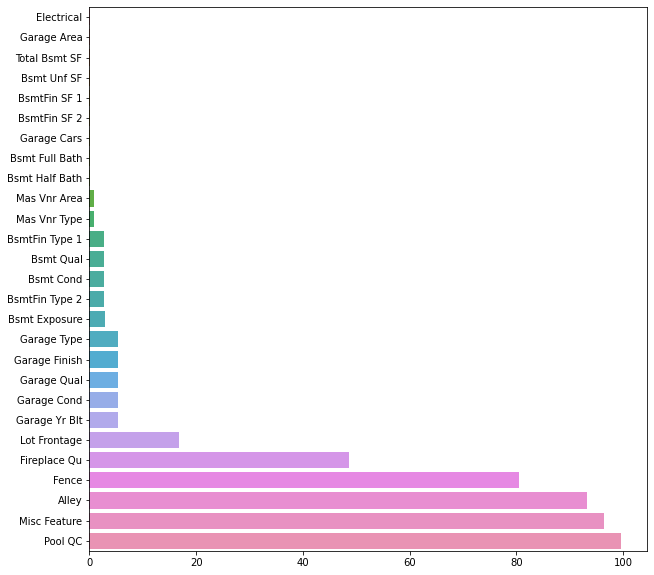

In [45]:
plt.figure(figsize=(10,10))
sns.barplot(y=percent_nan.index,x=percent_nan)

(0.0, 1.0)

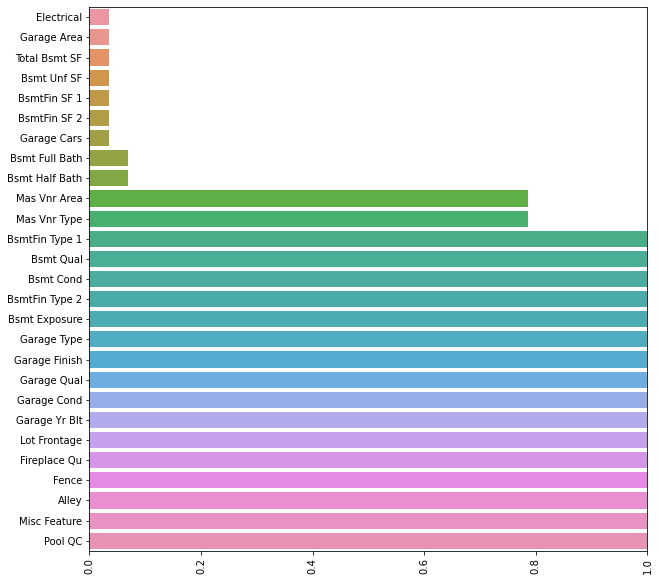

In [46]:
plt.figure(figsize=(10,10))
sns.barplot(x=percent_nan,y=percent_nan.index)
plt.xticks(rotation=90);
plt.xlim(0,1)